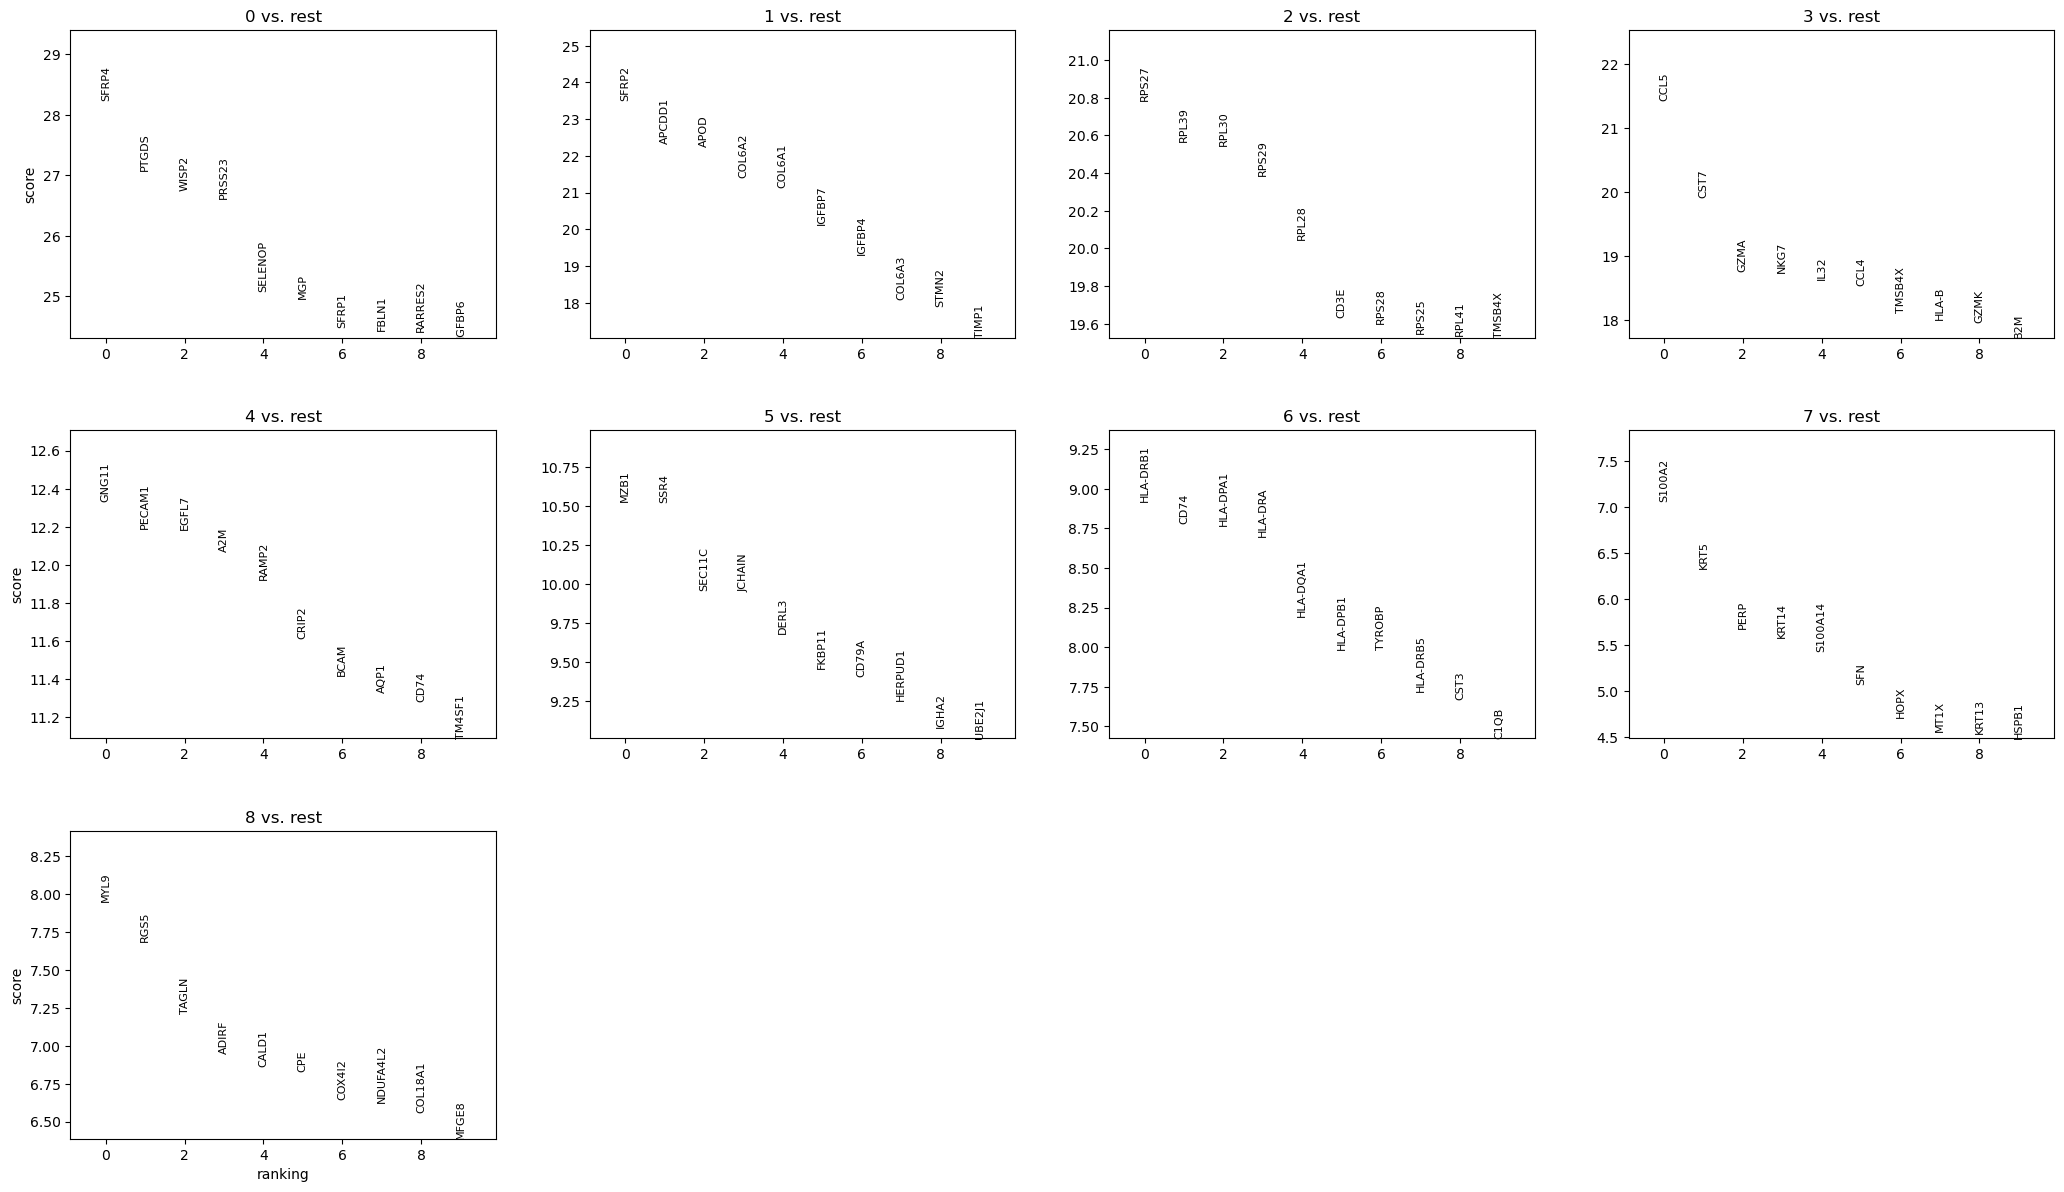

In [63]:
sc.tl.rank_genes_groups(adata, 'leiden_0.6', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)




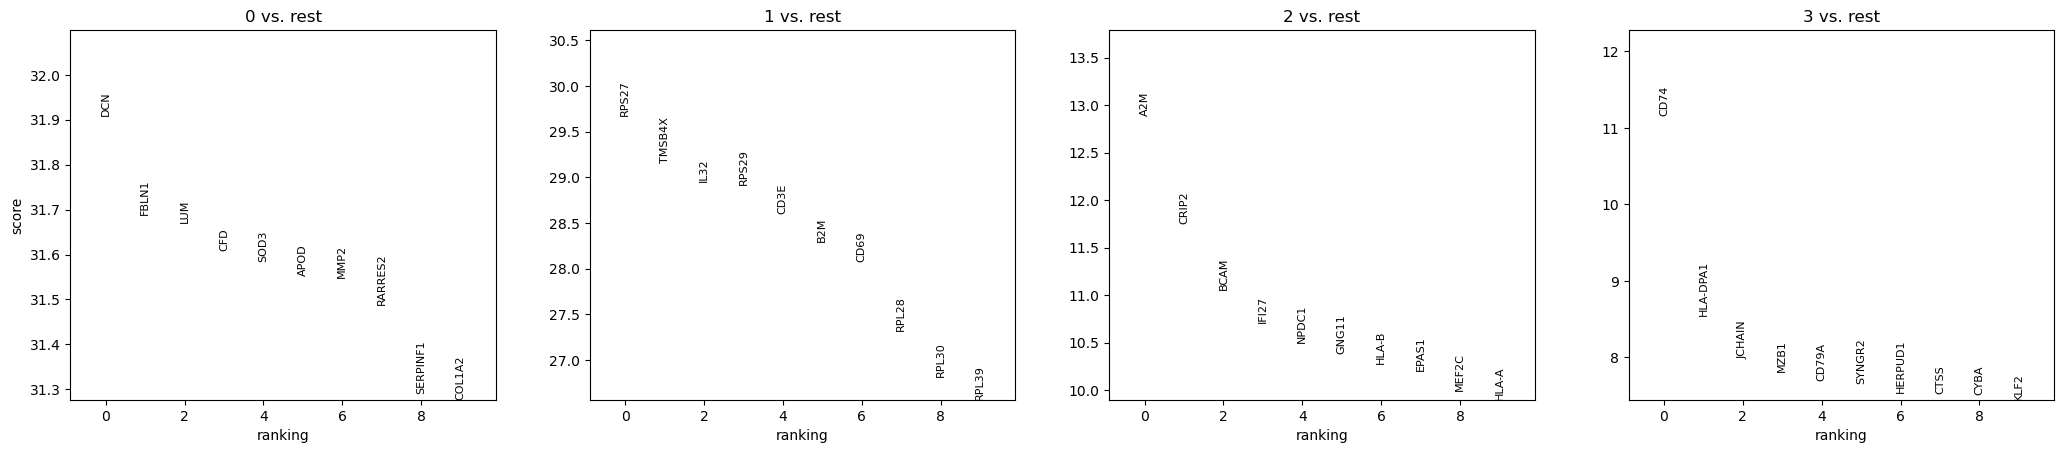

In [65]:
sc.tl.rank_genes_groups(adata, 'leiden_0.4', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)

In [29]:
markers = sc.get.rank_genes_groups_df(adata, group=None)
markers.head()


,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,SFRP4,28.229305,5.108337,2.555231e-175,4.216131e-171
1,0,PTGDS,27.080307,4.256112,1.679932e-161,1.385944e-157
2,0,WISP2,26.739548,4.077040,1.633683e-157,8.985256e-154
3,0,PRSS23,26.612881,3.552794,4.816093e-156,1.986638e-152
4,0,SELENOP,25.082750,3.104398,7.672103e-139,2.531794e-135


In [67]:
markers_4 = sc.get.rank_genes_groups_df(adata, group=None)
markers_4.head()

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,DCN,31.909733,7.209619,1.956685e-223,3.228530e-219
1,0,FBLN1,31.688976,7.815375,2.204132e-220,1.818409e-216
2,0,LUM,31.669800,7.252573,4.048851e-220,2.226868e-216
3,0,CFD,31.607935,7.935465,2.872513e-219,1.184912e-215
4,0,SOD3,31.583906,6.395196,6.141799e-219,2.026794e-215


In [69]:
for clust in markers_4['group'].unique():
    print(f"\nCluster {clust} top genes:")
    print(markers_4[markers_4['group'] == clust].head(10)[['names','logfoldchanges','pvals_adj']])



Cluster 0 top genes:
      names  logfoldchanges      pvals_adj
0       DCN        7.209619  3.228530e-219
1     FBLN1        7.815375  1.818409e-216
2       LUM        7.252573  2.226868e-216
3       CFD        7.935465  1.184912e-215
4      SOD3        6.395196  2.026794e-215
5      APOD        6.863209  4.400851e-215
6      MMP2        6.305609  4.533527e-215
7   RARRES2        6.132729  2.670354e-214
8  SERPINF1        5.857828  1.194074e-211
9    COL1A2        6.995735  1.589489e-211

Cluster 1 top genes:
        names  logfoldchanges      pvals_adj
16500   RPS27        1.584545  2.572106e-189
16501  TMSB4X        2.203553  4.947982e-183
16502    IL32        6.708633  1.199508e-180
16503   RPS29        2.264433  2.637808e-180
16504    CD3E        8.213240  1.381842e-176
16505     B2M        1.483298  8.359687e-173
16506    CD69        8.420347  2.756760e-170
16507   RPL28        1.435027  1.906914e-161
16508   RPL30        1.184020  1.633098e-155
16509   RPL39        1.233404  8.

In [30]:
for clust in markers['group'].unique():
    print(f"\nCluster {clust} top genes:")
    print(markers[markers['group'] == clust].head(10)[['names','logfoldchanges','pvals_adj']])



Cluster 0 top genes:
     names  logfoldchanges      pvals_adj
0    SFRP4        5.108337  4.216131e-171
1    PTGDS        4.256112  1.385944e-157
2    WISP2        4.077040  8.985256e-154
3   PRSS23        3.552794  1.986638e-152
4  SELENOP        3.104398  2.531794e-135
5      MGP        3.526509  3.821766e-134
6    SFRP1        3.124874  4.881890e-129
7    FBLN1        4.241579  1.772886e-128
8  RARRES2        3.208703  2.255694e-128
9   IGFBP6        3.181367  2.395072e-127

Cluster 1 top genes:
        names  logfoldchanges      pvals_adj
16500   SFRP2        4.431530  7.989303e-118
16501  APCDD1        3.976259  1.585506e-106
16502    APOD        3.779198  5.418646e-106
16503  COL6A2        2.887014   5.936316e-98
16504  COL6A1        2.762966   1.214517e-95
16505  IGFBP7        3.093343   9.056959e-87
16506  IGFBP4        2.795289   8.906298e-80
16507  COL6A3        2.468436   1.003941e-69
16508   STMN2        3.624820   2.852895e-68
16509   TIMP1        2.049425   6.390219e-62

In [70]:
markers_strong_4 = markers_4[
    (markers_4['pvals_adj'] < 0.05) & 
    (markers_4['logfoldchanges'] > 0.25)
]

markers_strong_4.groupby('group').head(10)

C:\Users\faizm\AppData\Local\Temp\ipykernel_24032\2631813481.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  markers_strong_4.groupby('group').head(10)


,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,DCN,31.909733,7.209619,1.956685e-223,3.228530e-219
1,0,FBLN1,31.688976,7.815375,2.204132e-220,1.818409e-216
2,0,LUM,31.669800,7.252573,4.048851e-220,2.226868e-216
3,0,CFD,31.607935,7.935465,2.872513e-219,1.184912e-215
4,0,SOD3,31.583906,6.395196,6.141799e-219,2.026794e-215
5,0,APOD,31.553600,6.863209,1.600309e-218,4.400851e-215
6,0,MMP2,31.547779,6.305609,1.923315e-218,4.533527e-215
7,0,RARRES2,31.487341,6.132729,1.294717e-217,2.670354e-214
8,0,SERPINF1,31.289356,5.857828,6.513131e-215,1.194074e-211
9,0,COL1A2,31.276857,6.995735,9.633269e-215,1.589489e-211


In [31]:
markers_strong = markers[
    (markers['pvals_adj'] < 0.05) & 
    (markers['logfoldchanges'] > 0.25)
]

markers_strong.groupby('group').head(10)


C:\Users\faizm\AppData\Local\Temp\ipykernel_24032\590395349.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  markers_strong.groupby('group').head(10)


,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,SFRP4,28.229305,5.108337,2.555231e-175,4.216131e-171
1,0,PTGDS,27.080307,4.256112,1.679932e-161,1.385944e-157
2,0,WISP2,26.739548,4.077040,1.633683e-157,8.985256e-154
3,0,PRSS23,26.612881,3.552794,4.816093e-156,1.986638e-152
4,0,SELENOP,25.082750,3.104398,7.672103e-139,2.531794e-135
...,...,...,...,...,...,...
132005,8,CPE,6.826005,5.937012,8.731186e-12,2.401076e-08
132006,8,COX4I2,6.644301,9.224180,3.046593e-11,7.136839e-08
132007,8,NDUFA4L2,6.625520,8.422166,3.460285e-11,7.136839e-08
132008,8,COL18A1,6.557862,3.337325,5.458484e-11,1.000722e-07
